In [89]:
import pandas as pd
import numpy as np

In [90]:
%pwd

'/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/data/round5'

In [91]:
%cd ../../../data/round5

[Errno 2] No such file or directory: '../../../data/round5'
/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/data/round5


In [92]:
df1 = pd.read_csv('raw/prices.csv')
df2 = pd.read_csv('raw/trades.csv')

In [93]:
products = df1['product'].unique()
products

array(['PICNIC_BASKET2', 'VOLCANIC_ROCK_VOUCHER_9750', 'RAINFOREST_RESIN',
       'VOLCANIC_ROCK_VOUCHER_9500', 'VOLCANIC_ROCK', 'SQUID_INK',
       'VOLCANIC_ROCK_VOUCHER_10250', 'KELP', 'DJEMBES', 'CROISSANTS',
       'MAGNIFICENT_MACARONS', 'JAMS', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_10500', 'PICNIC_BASKET1'], dtype=object)

In [94]:
#取出'VOLCANIC_ROCK_VOUCHER_9500',  'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_10000'
df1_rock = df1[df1['product'].isin(['VOLCANIC_ROCK', 'VOLCANIC_ROCK_VOUCHER_9500', 'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_10000', 'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500'])]

df2_rock = df2[df2['symbol'].isin(['VOLCANIC_ROCK', 'VOLCANIC_ROCK_VOUCHER_9500', 'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_10000', 'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500'])]


In [95]:
rock_buyers = df2_rock['buyer'].unique()
rock_sellers = df2_rock['seller'].unique()
print(f"rock buyers: {rock_buyers}, rock sellers: {rock_sellers}")
#计算每个trader的交易量
rock_trader_buy = df2_rock.groupby('buyer')['quantity'].sum()
rock_trader_sell = df2_rock.groupby('seller')['quantity'].sum()
print(f"rock trader buy: {rock_trader_buy}, rock trader sell: {rock_trader_sell}")


rock buyers: ['Camilla' 'Caesar' 'Penelope' 'Pablo' 'Peter'], rock sellers: ['Caesar' 'Peter' 'Pablo' 'Camilla' 'Penelope']
rock trader buy: buyer
Caesar       15481
Camilla     126864
Pablo          662
Penelope     14966
Peter         1439
Name: quantity, dtype: int64, rock trader sell: seller
Caesar      107649
Camilla      14244
Pablo        19427
Penelope     16459
Peter         1633
Name: quantity, dtype: int64


In [96]:
df2_rock

,timestamp,buyer,seller,symbol,currency,price,quantity
38,3500,Camilla,Caesar,VOLCANIC_ROCK_VOUCHER_10000,SEASHELLS,234.0,14
39,3500,Caesar,Caesar,VOLCANIC_ROCK_VOUCHER_10000,SEASHELLS,234.0,2
40,3500,Camilla,Caesar,VOLCANIC_ROCK_VOUCHER_10250,SEASHELLS,64.0,14
41,3500,Caesar,Caesar,VOLCANIC_ROCK_VOUCHER_10250,SEASHELLS,64.0,2
42,3500,Camilla,Caesar,VOLCANIC_ROCK_VOUCHER_10500,SEASHELLS,9.0,14
...,...,...,...,...,...,...,...
53468,2999500,Penelope,Caesar,VOLCANIC_ROCK_VOUCHER_9500,SEASHELLS,606.0,1
53469,2999500,Penelope,Camilla,VOLCANIC_ROCK_VOUCHER_9750,SEASHELLS,357.0,14
53470,2999500,Penelope,Caesar,VOLCANIC_ROCK_VOUCHER_9750,SEASHELLS,357.0,1
53472,2999600,Caesar,Pablo,VOLCANIC_ROCK,SEASHELLS,10104.0,2


In [101]:
# 初始化持仓记录：{"person": {"symbol": net_position}}
positions = {}

# 存储每个时间点的持仓数据
history = []

# 遍历每一笔交易
for _, row in df2_rock.iterrows():
    timestamp = row["timestamp"]
    buyer = row["buyer"]
    seller = row["seller"]
    symbol = row["symbol"]
    quantity = row["quantity"]
    
    # 初始化 buyer 和 seller 的持仓记录（如果不存在）
    if buyer not in positions:
        positions[buyer] = {}
    if seller not in positions:
        positions[seller] = {}
    if symbol not in positions[buyer]:
        positions[buyer][symbol] = 0
    if symbol not in positions[seller]:
        positions[seller][symbol] = 0
    
    # 更新持仓：
    # buyer 获得 quantity
    positions[buyer][symbol] += quantity
    # seller 减少 quantity
    positions[seller][symbol] -= quantity
    
    # 记录当前持仓状态（可以按需调整，比如每隔一定时间记录）
    history.append({
        "timestamp": timestamp,
        "person": buyer,
        "symbol": symbol,
        "position": positions[buyer][symbol],
    })
    history.append({
        "timestamp": timestamp,
        "person": seller,
        "symbol": symbol,
        "position": positions[seller][symbol],
    })

# 转换为 DataFrame
position_history = pd.DataFrame(history)

# 按 person + symbol + timestamp 排序
position_history = position_history.sort_values(["person", "symbol", "timestamp"])
position_history = position_history[position_history['person'] == 'Penelope']
position_history = position_history[position_history['symbol'] == 'VOLCANIC_ROCK_VOUCHER_9500']
# 查看结果
print(position_history)


       timestamp    person                      symbol  position
34          4800  Penelope  VOLCANIC_ROCK_VOUCHER_9500        15
44          7000  Penelope  VOLCANIC_ROCK_VOUCHER_9500        30
163        21400  Penelope  VOLCANIC_ROCK_VOUCHER_9500        13
252        30700  Penelope  VOLCANIC_ROCK_VOUCHER_9500        25
261        31200  Penelope  VOLCANIC_ROCK_VOUCHER_9500        14
...          ...       ...                         ...       ...
32866    2993800  Penelope  VOLCANIC_ROCK_VOUCHER_9500      -432
32924    2999300  Penelope  VOLCANIC_ROCK_VOUCHER_9500      -422
32926    2999300  Penelope  VOLCANIC_ROCK_VOUCHER_9500      -421
32936    2999500  Penelope  VOLCANIC_ROCK_VOUCHER_9500      -407
32938    2999500  Penelope  VOLCANIC_ROCK_VOUCHER_9500      -406

[1009 rows x 4 columns]


In [102]:
df1_rock = df1_rock[df1_rock['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']

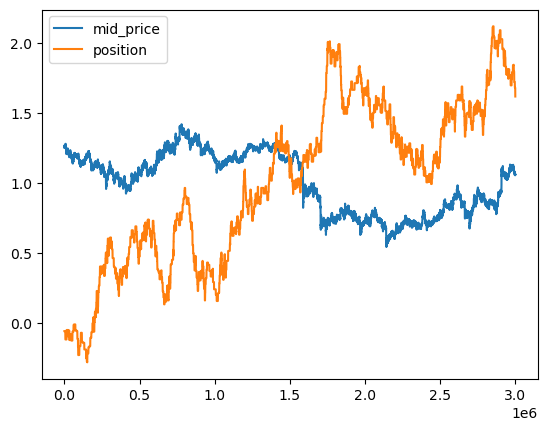

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# 确保时间戳列已排序
df1_rock = df1_rock.sort_values('timestamp')
position_history = position_history.sort_values('timestamp')

# 对齐到最近的 position 记录
df_aligned = pd.merge_asof(
    df1_rock[['timestamp', 'mid_price']],
    position_history[['timestamp', 'position']],
    on='timestamp',
    direction='nearest'  # 或 'forward'（向前匹配）
)

# 归一化绘图
plt.plot(df_aligned['timestamp'], df_aligned['mid_price'] / df_aligned['mid_price'].mean(), label='mid_price')
plt.plot(df_aligned['timestamp'], df_aligned['position'] / df_aligned['position'].mean(), label='position')
plt.legend()
